# Lab3 Assignment

In [1]:
# write code to load ariline the data 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update(**{'figure.dpi':150})
plt.style.use('ggplot') # can skip this - plots are more visually appealing with this style

In [3]:
use_cols = [
    # 29 columns out of 109
    "Year", "Month", "DayofMonth", "DayOfWeek", "DepTime", "CRSDepTime",
    "ArrTime", "CRSArrTime", "Reporting_Airline","Flight_Number_Reporting_Airline", 
    "Tail_Number", "ActualElapsedTime", "CRSElapsedTime", "AirTime", "ArrDelay", "DepDelay", "Origin", "Dest",
    "Distance", "TaxiIn", "TaxiOut", "Cancelled",
    "CancellationCode", "Diverted", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay",
    "LateAircraftDelay"
]

In [4]:
jan = pd.read_csv(
    'On_Time_Reporting_Carrier_On_Time_Performance_2019_1.csv',usecols=use_cols
)
print(f'Number of observations in Jan 2019: {jan.shape[0]}')

# rename a a few columns
jan.rename(
    columns={
        "Reporting_Airline":"UniqueCarrier", 
        "Flight_Number_Reporting_Airline":"FlightNum", 
        "Tail_Number":"TailNum"
    }, 
    inplace=True
)

# randomly sample 100k observations and perform analysis on this subset
jan = jan.sample(n=100000,random_state=1)

# repeat the same procedure on the July 2019 data
jul = pd.read_csv(
    'On_Time_Reporting_Carrier_On_Time_Performance_2019_7.csv',usecols=use_cols
)
print(f'Number of observations in July 2019: {jul.shape[0]}')

# rename a a few columns
jul.rename(
    columns={
        "Reporting_Airline":"UniqueCarrier", 
        "Flight_Number_Reporting_Airline":"FlightNum", 
        "Tail_Number":"TailNum"
    }, 
    inplace=True
)

# randomly sample 100k observations and perform analysis on this subset
jul = jul.sample(n=100000,random_state=1)

/Users/elinarawat/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Number of observations in Jan 2019: 583985
Number of observations in July 2019: 659029


## Please read the variable info at 'readme.html', choose at least two sets of variables to analyze including but not limited to, showing their basic statistic and visualization.

## Brief explain what you found. For example, you can show correlation between several variables and explain why their relation make sense,  or discover skewness, outlier etc for certain variables. 

In [5]:
def get_info(pd_frame):
    res = pd_frame.describe().transpose()
    res['missing_percent'] = [(pd_frame.shape[0] - res.loc[ind, 'count'])/pd_frame.shape[0] for ind in res.index]
    res['unique_val'] = [len(pd_frame.loc[:,ind].value_counts()) for ind in res.index]
    res['var_type'] = ['Continuous' if res.loc[ind, 'unique_val'] >=100 else 'Categorical' for ind in res.index]
    return res

In [7]:
jan_info = get_info(jan)
jan_info

,count,mean,std,min,25%,50%,75%,max,missing_percent,unique_val,var_type
Year,100000.0,2019.000000,0.000000,2019.0,2019.0,2019.0,2019.0,2019.0,0.00000,1,Categorical
Month,100000.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0,0.00000,1,Categorical
DayofMonth,100000.0,15.921430,8.980433,1.0,8.0,16.0,24.0,31.0,0.00000,31,Categorical
DayOfWeek,100000.0,3.830870,1.920896,1.0,2.0,4.0,5.0,7.0,0.00000,7,Categorical
FlightNum,100000.0,2535.598870,1820.716133,1.0,985.0,2111.0,3896.0,7439.0,0.00000,6482,Continuous
CRSDepTime,100000.0,1324.782600,483.773916,1.0,915.0,1320.0,1730.0,2359.0,0.00000,1212,Continuous
DepTime,97190.0,1329.857866,495.278799,1.0,920.0,1326.0,1737.0,2400.0,0.02810,1355,Continuous
DepDelay,97190.0,9.636012,48.173583,-46.0,-6.0,-3.0,5.0,1500.0,0.02810,583,Continuous
TaxiOut,97140.0,18.332582,10.921151,1.0,12.0,15.0,21.0,181.0,0.02860,138,Continuous
TaxiIn,97074.0,7.610957,6.079588,1.0,4.0,6.0,9.0,282.0,0.02926,100,Continuous


In [8]:
jul_info = get_info(jul)
jul_info

,count,mean,std,min,25%,50%,75%,max,missing_percent,unique_val,var_type
Year,100000.0,2019.000000,0.000000,2019.0,2019.0,2019.0,2019.0,2019.0,0.00000,1,Categorical
Month,100000.0,7.000000,0.000000,7.0,7.0,7.0,7.0,7.0,0.00000,1,Categorical
DayofMonth,100000.0,16.248200,8.848690,1.0,9.0,16.0,24.0,31.0,0.00000,31,Categorical
DayOfWeek,100000.0,3.761740,2.007360,1.0,2.0,4.0,5.0,7.0,0.00000,7,Categorical
FlightNum,100000.0,2564.448680,1784.995915,1.0,1050.0,2214.0,3899.0,7439.0,0.00000,6343,Continuous
CRSDepTime,100000.0,1335.421270,499.863919,5.0,911.0,1325.0,1745.0,2359.0,0.00000,1194,Continuous
DepTime,98152.0,1335.826320,520.249159,1.0,909.0,1325.0,1753.0,2400.0,0.01848,1365,Continuous
DepDelay,98151.0,14.365417,56.442770,-32.0,-5.0,-2.0,9.0,1462.0,0.01849,649,Continuous
TaxiOut,98042.0,17.345250,10.507213,1.0,11.0,15.0,20.0,164.0,0.01958,149,Continuous
TaxiIn,98014.0,8.003775,6.928073,1.0,4.0,6.0,9.0,198.0,0.01986,121,Continuous


In [9]:
jan_per_missing = (jan.isnull().sum()/jan.shape[0]).round(2)
jan_per_missing[jan_per_missing > 0]

DepTime              0.03
DepDelay             0.03
TaxiOut              0.03
TaxiIn               0.03
ArrTime              0.03
ArrDelay             0.03
CancellationCode     0.97
ActualElapsedTime    0.03
AirTime              0.03
CarrierDelay         0.82
WeatherDelay         0.82
NASDelay             0.82
SecurityDelay        0.82
LateAircraftDelay    0.82
dtype: float64

In [10]:
jul_per_missing = (jul.isnull().sum()/jul.shape[0]).round(2)
jul_per_missing[jul_per_missing > 0]

DepTime              0.02
DepDelay             0.02
TaxiOut              0.02
TaxiIn               0.02
ArrTime              0.02
ArrDelay             0.02
CancellationCode     0.98
ActualElapsedTime    0.02
AirTime              0.02
CarrierDelay         0.79
WeatherDelay         0.79
NASDelay             0.79
SecurityDelay        0.79
LateAircraftDelay    0.79
dtype: float64

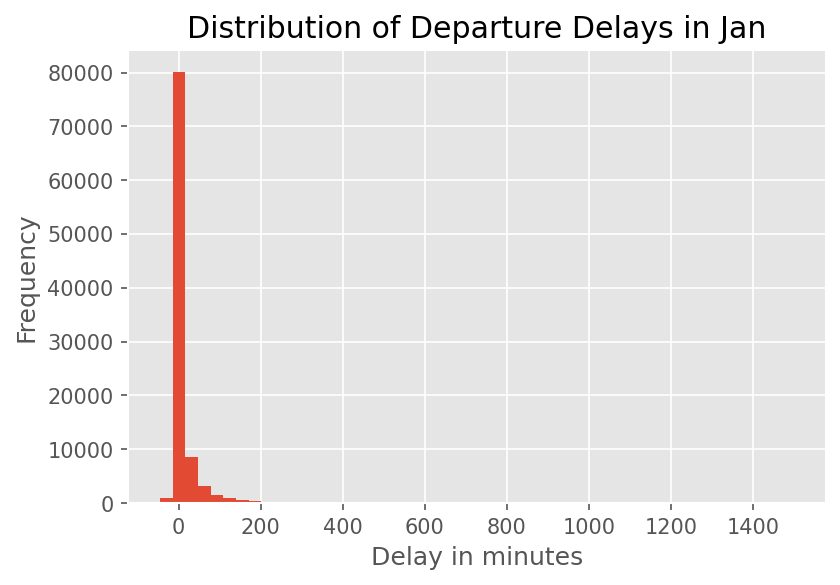

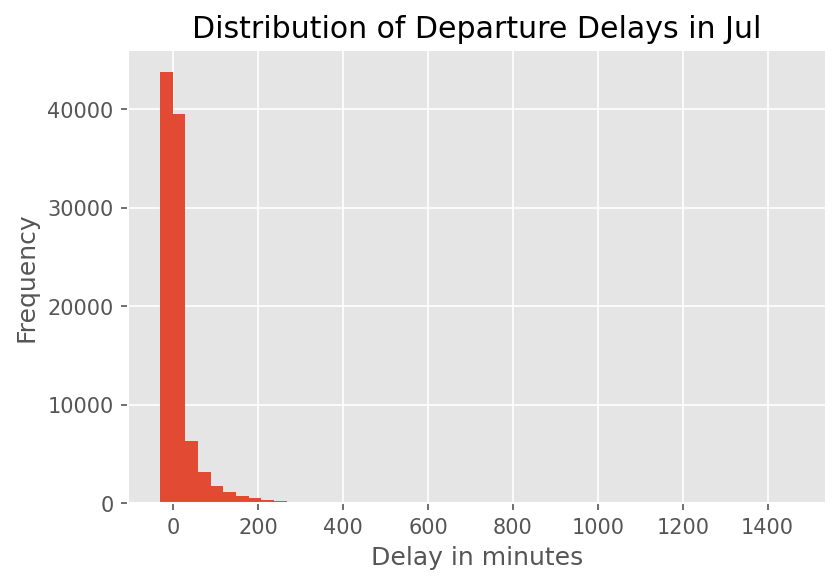

In [16]:
# Histogram displaying departure delays
jan['DepDelay'].hist(bins=50)
plt.title('Distribution of Departure Delays in Jan')
plt.xlabel('Delay in minutes')
plt.ylabel('Frequency')
plt.show()

jul['DepDelay'].hist(bins=50)
plt.title('Distribution of Departure Delays in Jul')
plt.xlabel('Delay in minutes')
plt.ylabel('Frequency')
plt.show()


The peak of the histogram is much shorter in July than January, demonstrating that departure delays occur much less frequently in July than January. In addition to being taller, the histogram is thinner in January, showing that it has a lower standard deviation. Shorter and wider curves indicate a higher standard deviation, so July's departure delays have a higher standard deviation (looking at the values of frequency, we can see which graph would be taller vs shorter). The data being skewed to the left for both graphs makes sense, as most flights should not have significant delays (otherwise there is an issue on the airline's part). Also, the graph doesn't look like a normal distribution because there cannot be a negative delay, so the left side of the bell curve is not complete.

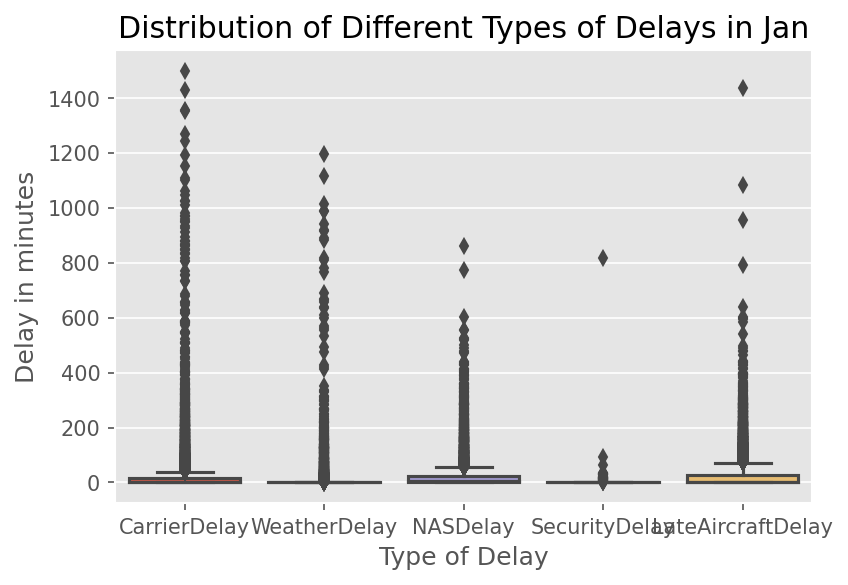

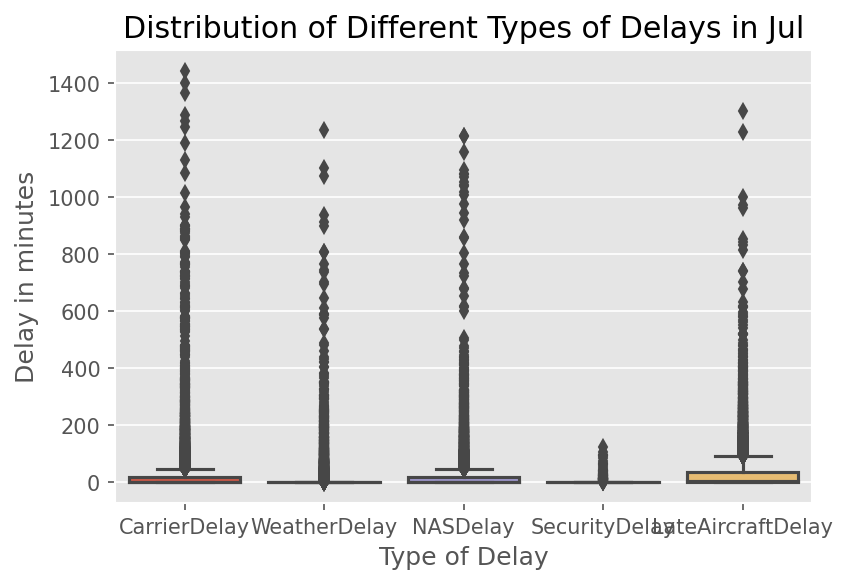

In [17]:
# Boxplot showing flight delays for different reasons
sns.boxplot(data=jan[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']])
plt.title('Distribution of Different Types of Delays in Jan')
plt.xlabel('Type of Delay')
plt.ylabel('Delay in minutes')
plt.show()

sns.boxplot(data=jul[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']])
plt.title('Distribution of Different Types of Delays in Jul')
plt.xlabel('Type of Delay')
plt.ylabel('Delay in minutes')
plt.show()

January seems to have more outliers than July for the types of delays (there are more points in the January boxplots which are well above the median). July has more National Air Security delays (NASDelay) than January, whereas January has more weather-related delays. All of the types of delays for January or July have positive skewness, so most of the points are clustered to the lower end, meaning that most delays are small.

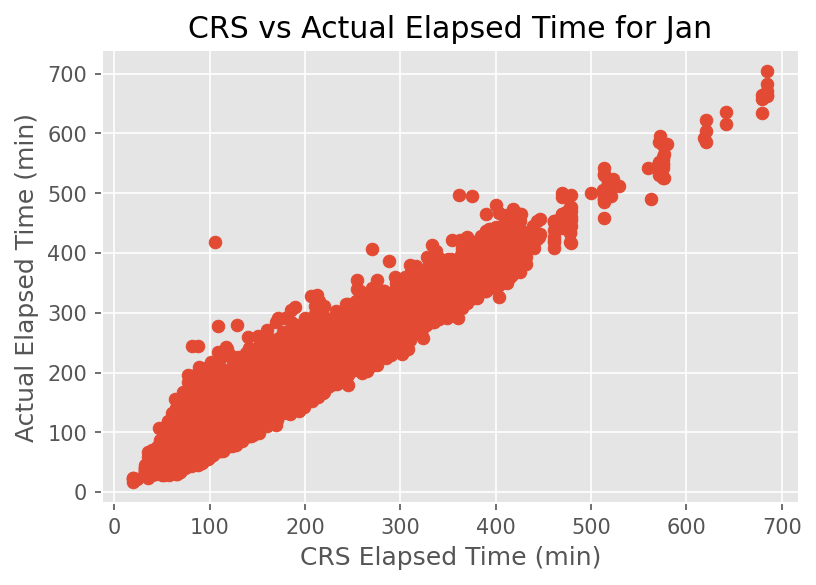

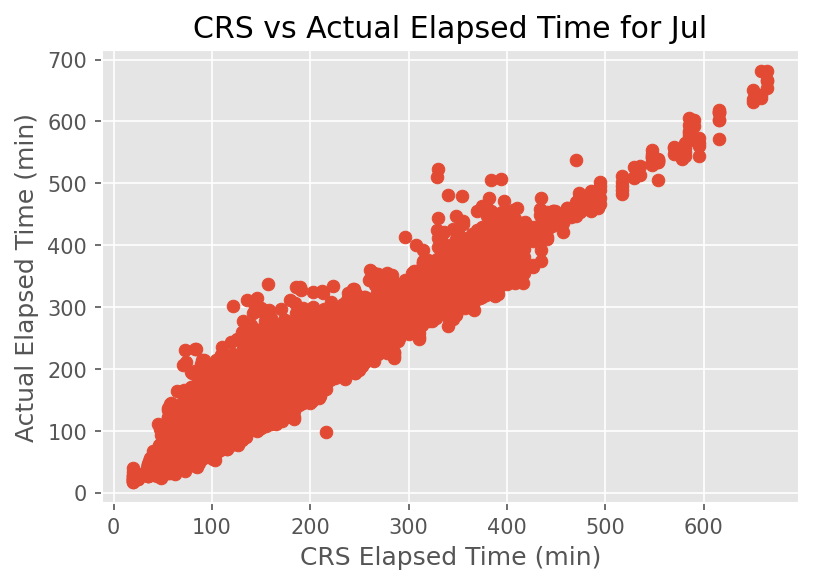

In [18]:
# Scatter plot analyzing flight times
plt.scatter(jan['CRSElapsedTime'], jan['ActualElapsedTime'])
plt.title('CRS vs Actual Elapsed Time for Jan')
plt.xlabel('CRS Elapsed Time (min)')
plt.ylabel('Actual Elapsed Time (min)')
plt.show()

plt.scatter(jul['CRSElapsedTime'], jul['ActualElapsedTime'])
plt.title('CRS vs Actual Elapsed Time for Jul')
plt.xlabel('CRS Elapsed Time (min)')
plt.ylabel('Actual Elapsed Time (min)')
plt.show()

For both January and July, there is a lot more variability for the first ~450 minutes of elapsed time (either actual or CRS), and then variability decreases as points appear more tightly clustered around the diagonal line. Regardless, there is a very strong correlation between Actual Elapsed Time and CRS Elapsed Time. This makes sense because the difference between estimations and actual flight time should not usually be that different, otherwise there is an issue with airlines' calculation systems.